In [ ]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cleaning Event Detection

Author: Clemens Jochum

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.data.import_data import import_df_from_zip_pkl
from src.data.make_dataset import remove_clipping_with_flexible_window, remove_clipping_with_universal_window

from src.models.detect_soiling import detect_cleaning_events_with_rollling_avg

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

#plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams['figure.dpi'] = 250
#'font.size': 10, 'savefig.dpi': 72, 'figure.subplot.bottom': 0.125

### Import Datasets

Use a random dataset for each type of synthetic data.

In [ ]:
path_to_data_raw = '../data/raw/'

list_data_keys = ['basic', 'soil', 'soil_weather', 'weather']
list_index_random = np.ones(len(list_data_keys), dtype=np.int)
#list_index_random = np.random.randint(50, size=len(list_data_keys))

dict_index_dataset = {}
for (data_key, dataset_index) in zip(list_data_keys, list_index_random):
    dict_index_dataset[data_key] = dataset_index
    
dict_data_paths = {}
for data_key in list_data_keys:
    dict_data_paths[data_key] = '{0:s}/synthetic_{1:s}.zip'.format(path_to_data_raw, data_key)

In [ ]:
dict_df = {}
for data_key in list_data_keys:
    dict_df[data_key] = {}
    dict_df[data_key]['T'] = import_df_from_zip_pkl(dict_data_paths[data_key], dict_index_dataset[data_key])

### Resample Datasets

Downsample minutes ('T') to hours ('H'), days ('D'), weeks ('W'), months ('MS'), and years ('AS') using mean.

In [ ]:
list_resample_rules = ['H', 'D', 'W', 'MS', 'AS']

dict_label_resample_rules = {
    'T' : 'minute',
    'H' : 'hour',
    'D' : 'day',
    'W' : 'week',
    'MS' : 'month',
    'AS' : 'year',
}

dict_timeunits_per_year = {
    'MS' : 12,
    'W' : 52,
    'D' : 365,
    'H' : 24 * 365,
    'T' : 60 * 24 * 365,
}

In [ ]:
for data_key in list_data_keys:
    for resample_rule in list_resample_rules:
        dict_df[data_key]['T'] = remove_clipping_with_universal_window(dict_df[data_key]['T'])
        dict_df[data_key][resample_rule] = dict_df[data_key]['T'].resample(resample_rule).mean()

### Detect cleaning events


In [ ]:
df = dict_df['weather']['D']
cleaning_profile, cleaning_events = detect_cleaning_events_with_rollling_avg(df['Power'])

plt.rcParams["figure.figsize"] = [10, 10]
fig, axarr = plt.subplots(4)

axarr[0].plot(df['Soiling'].to_numpy())
axarr[1].plot(cleaning_profile)
axarr[2].plot(np.diff(cleaning_profile))
axarr[3].plot(df['Power'].to_numpy())

for pos in cleaning_events:
    axarr[0].axvline(x=pos-0.0, color='k', linestyle='--', linewidth=0.5)
    axarr[1].axvline(x=pos-1.0, color='k', linestyle='--', linewidth=0.5)
    axarr[2].axvline(x=pos-1.5, color='k', linestyle='--', linewidth=0.5)
    axarr[3].axvline(x=pos-2.0, color='k', linestyle='--', linewidth=0.5)

xmin, xmax = 0, df['Power'].size
#xmin, xmax = 1000, 1100
#xmin, xmax = 1270, 1280
axarr[0].set_xlim([xmin, xmax])
axarr[1].set_xlim([xmin, xmax])
axarr[2].set_xlim([xmin, xmax])
axarr[3].set_xlim([xmin, xmax])

plt.show()

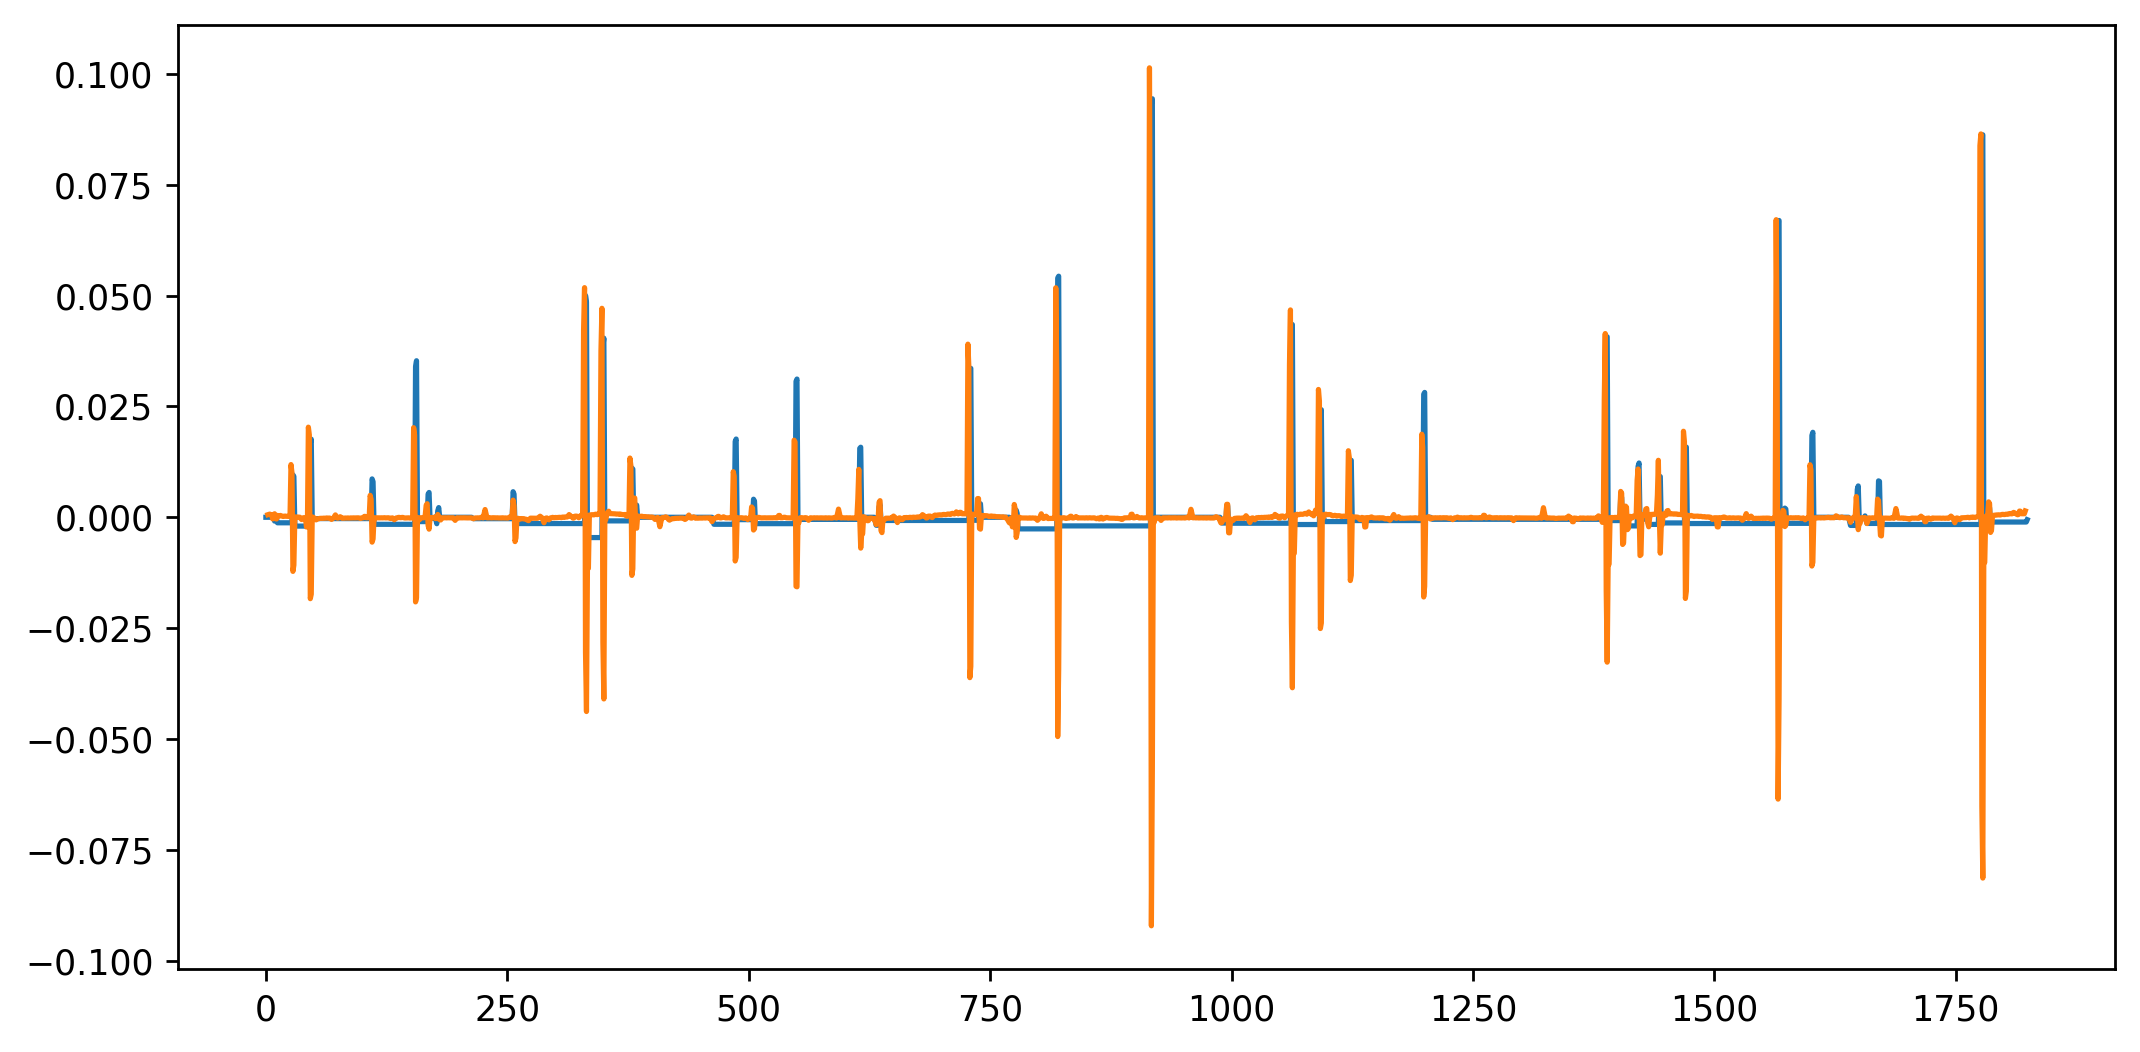

[False False False ... False False False]


datetime
2015-01-01 00:00:00-05:00    1.000000
2015-01-02 00:00:00-05:00    1.000000
2015-01-03 00:00:00-05:00    1.000000
2015-01-04 00:00:00-05:00    1.000000
2015-01-05 00:00:00-05:00    1.000000
2015-01-06 00:00:00-05:00    1.000000
2015-01-07 00:00:00-05:00    1.000000
2015-01-08 00:00:00-05:00    1.000000
2015-01-09 00:00:00-05:00    1.000000
2015-01-10 00:00:00-05:00    1.000000
2015-01-11 00:00:00-05:00    0.999141
2015-01-12 00:00:00-05:00    0.998518
2015-01-13 00:00:00-05:00    0.998133
2015-01-14 00:00:00-05:00    0.996889
2015-01-15 00:00:00-05:00    0.995644
2015-01-16 00:00:00-05:00    0.994400
2015-01-17 00:00:00-05:00    0.993155
2015-01-18 00:00:00-05:00    0.991910
2015-01-19 00:00:00-05:00    0.990666
2015-01-20 00:00:00-05:00    0.989421
2015-01-21 00:00:00-05:00    0.988176
2015-01-22 00:00:00-05:00    0.986932
2015-01-23 00:00:00-05:00    0.985687
2015-01-24 00:00:00-05:00    0.984443
2015-01-25 00:00:00-05:00    0.983198
2015-01-26 00:00:00-05:00    0.981953
201

In [49]:
plt.rcParams["figure.figsize"] = [10, 5]

diff_01 = np.diff(dict_df['soil']['D']['Soiling'].to_numpy())
diff_02 = np.diff(diff_avg_1)

plt.plot(diff_01)
plt.plot(diff_02)

#plt.xlim([1.0e5, 1.01e5])
plt.show()


df = dict_df['soil']['D']['Soiling']



print(diff > 0.0)

df.head(50)

In [ ]:
#cleaning_events = np.where(np.diff(cleaning_profile, 2) <= -0.020)[0]
#cleaning_events += 1 #np.ones(cleaning_events.shape)
#print(cleaning_events)
#np.mean(cleaning_events[i + (window_size - 1)], cleaning_events[i - (window_size - 1)])
#cleaning_events = np.where(cleaning_profile 
#cleaning_events += 1 #np.ones(cleaning_events.shape)
#print(cleaning_events)
#print(df['Power'].to_numpy()[0:10], df['Power'].to_numpy()[-10:])
#print(cleaning_profile[0:10], cleaning_profile[-10:])